# Exploratory Data Analysis: Titanic Dataset

---

## Introduction and Preparation

In this notebook we will explore titanic dataset and then make an analysis about the information we can get from it. But before that, let's we take a look on description from kaggle:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

__Import libraries__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the dataset from csv file

In [4]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset_submission = pd.read_csv('gender_submission.csv')

What are these three dataset mean?

- dataset_train is our training set, where our machine learning model learn about the data.
- dataset_test is our test set, where our machine learning model try to predict the result, which is whether someone survived or not from titanic incident, given information from training set.
- dataset_submission is our validation set, which the truth outcome and we will compare it with our predicted outcome.

In [4]:
dataset_train.shape

(891, 12)

In [5]:
dataset_test.shape

(418, 11)

Training set contains 891 data points and test set contains 418 data points, with 12 features (11 features for test set because survived feature is not included).

Now, take a loot what are those features are

In [10]:
print(list(dataset_train.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Description of feature names:
- PassengerId: Passenger ID
- Survived: Survived
- Pclass: Ticket class
- Name: Name
- Sex: Sex
- Age: Age in years
- Sibsp: Number of siblings / spouses aboard the Titanic
- Parch: Number of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)

Now, we have a pretty good background knowledge about our dataset. But, because we want to explore the data in general, we have to combine this 3 different data into a one comprehensive dataset.

In [5]:
data_merged = pd.merge(dataset_test, dataset_submission, on='PassengerId')
col = data_merged.columns
col = ['PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
data_merged = data_merged[col]

In [4]:
data_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset = pd.concat([dataset_train, data_merged])

---

## Data Exploration and Visualization

Let's explore the data by ask and answer this list of questions:
- How many passengers survived?
- How many passengers survived based on gender?
- How many passengers survived based on passanger's class?
- How many passengers survived based on age?
- Is there any correlation between survived and gender? How strong it is?
- Is there any correlation between survived and passenger's class? How strong it is?
- Is there any correlation between survived and age?

In [123]:
# for autolabeling the bar plot
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# generate random color
def random_color(length):
    return np.random.uniform(0.3, 1, size=(length, 3))

### How many passenger survived?

In [72]:
print("Number of passengers on board: {}".format(dataset.shape[0]))
print("Number of passengers survived: {}".format(dataset['Survived'].sum()))
print("Percentage of passangers survived: {:.2f}%".format((dataset['Survived'].sum()/dataset.shape[0])*100))

Number of passengers on board: 1309
Number of passengers survived: 494
Percentage of passangers survived: 37.74%


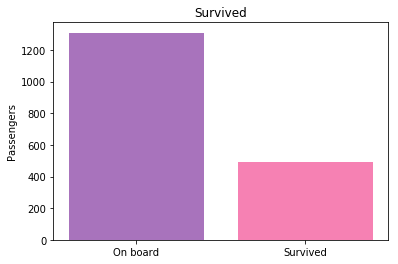

In [124]:
plt.bar(range(2), [1309, 494], color=random_color(2))
plt.xticks(range(2), ['On board', 'Survived']);
plt.ylabel('Passengers')
plt.title('Survived');

We see that it is only 37.74% passengers survived titanic disaster.

### How many passengers survived based on gender?

In [74]:
print("Number of male passengers: {}".format(dataset[dataset['Sex'] == 'male'].shape[0]))
print("Number of female passengers: {}".format(dataset[dataset['Sex'] == 'female'].shape[0]))
print("Number of male passengers survived: {}".format(dataset[dataset['Sex'] == 'male']['Survived'].sum()))
print("Number of female passengers survived: {}".format(dataset[dataset['Sex'] == 'female']['Survived'].sum()))
male_percentage = (dataset[dataset['Sex'] == 'male']['Survived'].sum()/dataset[dataset['Sex'] == 'male'].shape[0]) * 100
female_percentage = (dataset[dataset['Sex'] == 'female']['Survived'].sum()/dataset[dataset['Sex'] == 'female'].shape[0]) * 100
print("Percentage of male passengers survived: {:.2f}%".format(male_percentage))
print("Percentage of female passengers survived: {:.2f}%".format(female_percentage))

Number of male passengers: 843
Number of female passengers: 466
Number of male passengers survived: 109
Number of female passengers survived: 385
Percentage of male passengers survived: 12.93%
Percentage of female passengers survived: 82.62%


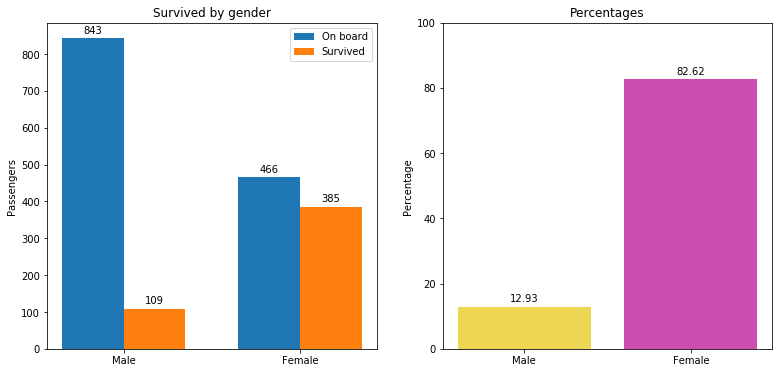

In [125]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(13, 6)

labels = ['Male', 'Female']
onboard = [843, 466]
survived = [109, 385]
percentages = [12.93, 82.62]
x = np.arange(len(labels))
width = 0.35

# axes0
rects1 = ax[0].bar(x - width/2, onboard, width, label='On board')
rects2 = ax[0].bar(x + width/2, survived, width, label='Survived')
ax[0].set(xticks=x, xticklabels=labels, ylabel='Passengers', title='Survived by gender')
ax[0].legend()

# axes1
rects3 = ax[1].bar(x, percentages, color=random_color(len(labels)))
ax[1].set(xticks=x, xticklabels=labels, ylabel='Percentage', ylim=(0, 100), title='Percentages')

autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])

From representation above, we see that percentage of male survived from titanic disaster is just merely 12.93%, instead female survived is 82.62%, which means ~80% difference in percentage.

### How many passengers survived based on passengers's class?

In [76]:
print("Number of passengers from first class: {}".format(dataset[dataset['Pclass'] == 1].shape[0]))
print("Number of passengers survived from first class: {}".format(dataset[dataset['Pclass'] == 1 ]['Survived'].sum()))
print("Number of passengers from second class: {}".format(dataset[dataset['Pclass'] == 2].shape[0]))
print("Number of passengers survived from second class: {}".format(dataset[dataset['Pclass'] == 2 ]['Survived'].sum()))
print("Number of passengers from third class: {}".format(dataset[dataset['Pclass'] == 3].shape[0]))
print("Number of passengers survived from third class: {}".format(dataset[dataset['Pclass'] == 3 ]['Survived'].sum()))
percentage1 = (dataset[dataset['Pclass'] == 1 ]['Survived'].sum()/(dataset[dataset['Pclass'] == 1].shape[0]))*100
percentage2 = (dataset[dataset['Pclass'] == 2 ]['Survived'].sum()/(dataset[dataset['Pclass'] == 2].shape[0]))*100
percentage3 = (dataset[dataset['Pclass'] == 3 ]['Survived'].sum()/(dataset[dataset['Pclass'] == 3].shape[0]))*100
print("Percentage of passengers from first class survived: {:.2f}%".format(percentage1))
print("Percentage of passengers from second class survived: {:.2f}%".format(percentage2))
print("Percentage of passengers from third class survived: {:.2f}%".format(percentage3))

Number of passengers from first class: 323
Number of passengers survived from first class: 186
Number of passengers from second class: 277
Number of passengers survived from second class: 117
Number of passengers from third class: 709
Number of passengers survived from third class: 191
Percentage of passengers from first class survived: 57.59%
Percentage of passengers from second class survived: 42.24%
Percentage of passengers from third class survived: 26.94%


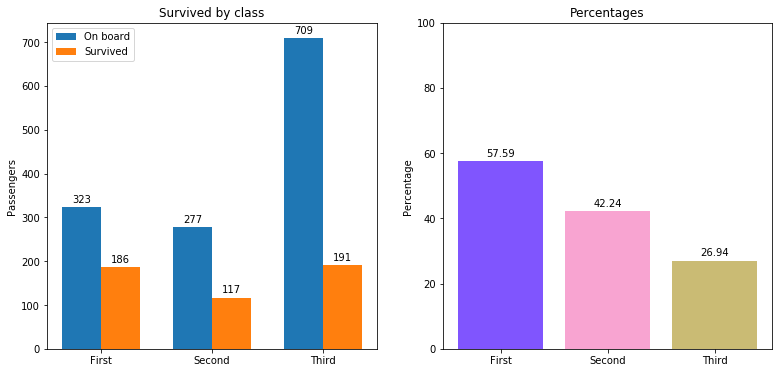

In [127]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(13, 6)

labels = ['First', 'Second', 'Third']
onboard = [323, 277, 709]
survived = [186, 117, 191]
percentages = [57.59, 42.24, 26.94]
x = np.arange(len(labels))
width = 0.35

# axes0
rects1 = ax[0].bar(x - width/2, onboard, width, label='On board')
rects2 = ax[0].bar(x + width/2, survived, width, label='Survived')
ax[0].set(xticks=x, xticklabels=labels, ylabel='Passengers', title='Survived by class')
ax[0].legend()

# axes1
rects3 = ax[1].bar(x, percentages, color=random_color(len(labels)))
ax[1].set(xticks=x, xticklabels=labels, ylabel='Percentage', ylim=(0, 100), title='Percentages')

autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])

From bar plot above, we can see that survival rate for first class surely better than second class and third class. If we look at percentages bar plot from left to right, there is approximately 15% decreasing gap between classes, for example first class ~15% better in survival rate than second class and ~30% better than third class. 

### How many passengers survived based on age?

We will split the age into four interval: 0-20, 20-40, 40-60, >60

In [141]:
print("Number of passengers age <20: {}".format(dataset[dataset['Age'] < 20].shape[0]))
print("Number of passengers age <20 survived: {}".format(dataset[dataset['Age'] < 20]['Survived'].sum()))
print("Number of passengers age 20 to 40: {}".format(dataset[(dataset['Age'] >= 20) & (dataset['Age'] < 40)].shape[0]))
print("Number of passengers age 20 to 40 survived: {}".format(dataset[(dataset['Age'] >= 20) & (dataset['Age'] < 40)]['Survived'].sum()))
print("Number of passengers age 40 to 60: {}".format(dataset[(dataset['Age'] >= 40) & (dataset['Age'] < 60)].shape[0]))
print("Number of passengers age 40 to 40 survived: {}".format(dataset[(dataset['Age'] >= 40) & (dataset['Age'] < 60)]['Survived'].sum()))
print("Number of passengers age >60: {}".format(dataset[dataset['Age'] >= 60].shape[0]))
print("Number of passengers age >60 survived: {}".format(dataset[dataset['Age'] >= 60]['Survived'].sum()))
print("Number of passengers with unknown age: {}".format(dataset['Age'].isna().sum()))
print("Number of passengers with unknown age survived: {}".format(dataset[dataset['Age'].isna()]['Survived'].sum()))
percentage1 = (dataset[dataset['Age'] < 20]['Survived'].sum() / dataset[dataset['Age'] < 20].shape[0])*100
percentage2 = (dataset[(dataset['Age'] >= 20) & (dataset['Age'] < 40)]['Survived'].sum() / (dataset[(dataset['Age'] >= 20) & (dataset['Age'] < 40)].shape[0]))*100
percentage3 = (dataset[(dataset['Age'] >= 40) & (dataset['Age'] < 60)]['Survived'].sum() / (dataset[(dataset['Age'] >= 40) & (dataset['Age'] < 60)].shape[0]))*100
percentage4 = (dataset[dataset['Age'] > 60]['Survived'].sum() / dataset[dataset['Age'] > 60].shape[0])*100
percentage5 = (dataset[dataset['Age'].isna()]['Survived'].sum() / dataset['Age'].isna().sum())*100
print("Percentage of passanger age <20 survived: {:.2f}%".format(percentage1))
print("Percentage of passanger age 20-40 survived: {:.2f}%".format(percentage2))
print("Percentage of passanger age 40-60 survived: {:.2f}%".format(percentage3))
print("Percentage of passanger age >60 survived: {:.2f}%".format(percentage4))
print("Percentage of passanger with unknown age survived: {:.2f}%".format(percentage5))

Number of passengers age <20: 225
Number of passengers age <20 survived: 107
Number of passengers age 20 to 40: 576
Number of passengers age 20 to 40 survived: 219
Number of passengers age 40 to 60: 205
Number of passengers age 40 to 40 survived: 77
Number of passengers age >60: 40
Number of passengers age >60 survived: 14
Number of passengers with unknown age: 263
Number of passengers with unknown age survived: 77
Percentage of passanger age <20 survived: 47.56%
Percentage of passanger age 20-40 survived: 38.02%
Percentage of passanger age 40-60 survived: 37.56%
Percentage of passanger age >60 survived: 27.27%
Percentage of passanger with unknown age survived: 29.28%


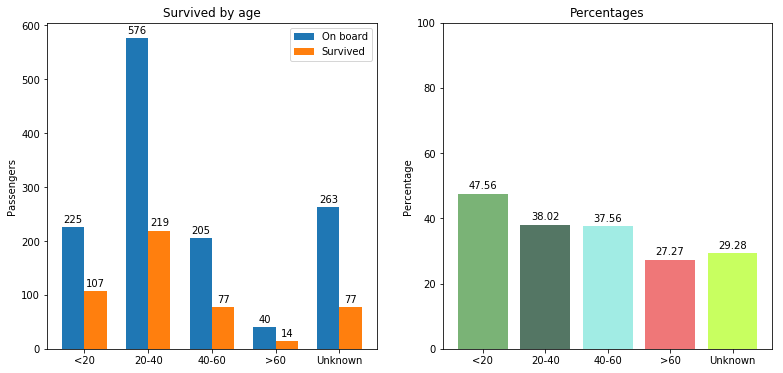

In [143]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(13, 6)

labels = ['<20', '20-40', '40-60', '>60', 'Unknown']
onboard = [225, 576, 205, 40, 263]
survived = [107, 219, 77, 14, 77]
percentages = [47.56, 38.02, 37.56, 27.27, 29.28]
x = np.arange(len(labels))
width = 0.35  # the width of the bars

# axes0
rects1 = ax[0].bar(x - width/2, onboard, width, label='On board')
rects2 = ax[0].bar(x + width/2, survived, width, label='Survived')
ax[0].set(xticks=x, xticklabels=labels, ylabel='Passengers', title='Survived by age')
ax[0].legend()

# axes1
rects3 = ax[1].bar(x, percentages, color=random_color(len(labels)))
ax[1].set(xticks=x, xticklabels=labels, ylabel='Percentage', ylim=(0, 100), title='Percentages')
        
autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])

From representation above, we can see that most of the passengers in titanic are between age 20-40 years old. But the survival percentage for age 20-40 and age 40-60 are not so different. Also, we can see that passengers age less than 20 years old have better survival percentage. 

### Is it any correlation between survived and gender? How strong it is?

In [25]:
ser = dataset['Sex'].map({'male':0, 'female':1})
print("Corelation coefficient: {:.5f}".format(dataset['Survived'].corr(ser)))

Corelation coefficient: 0.68837


In here I encode male as 0 and female as 1, dead as 0 and survived as 1. The result of correlation is 0.68837, a positive value means positive correlation, in this case, being female and survived are correlated. And how strong is this correlation? 0.68837 gives us a pretty good sense of correlation. But one thing to remember is correlation doesn't mean causation, and vice versa.

### Is it any correlation between survived and passenger's class? How strong it is?

In [26]:
print("Correlation coefficient: {:.5f}".format(dataset['Survived'].corr(dataset['Pclass'])))

Correlation coefficient: -0.26471


The correlation coefficient is negative, which means as the Survived column increases (1 is survived, 0 is dead), Pclass decreases (class 1 is better than class 2 or 3). Yet, the correlation is not so strong.

In [15]:
dataset['Survived'].corr(dataset['Age']/(dataset['Age'].max() - dataset['Age'].min()))

-0.053694711809795674

### Is it any correlation between survived and age? How strong it is?

In [28]:
print("Correlation coefficient: {:.5f}".format(dataset['Survived'].corr(dataset['Age'])))

Correlation coefficient: -0.05369


The correlation coefficient is negative, but the value is quite close to zero.

---

## Summary

We have seen from our exploratory analysis that titanic disaster has a high death toll, so many lives were lost that day. With men as the most contributor to that high number, we can certain that on that day of the accident, the priorities of evacuation are woman, high class passenger and younger age passenger. These priorities are surely common to this day, we save woman and children first when an accident happen. 